# Smile vs No Smile Images Classification

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data_dir = 'Images' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
df_attr = pd.read_csv('list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

In [6]:
df_partition = pd.read_csv('list_eval_partition.csv')
df_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [7]:
for i in df_attr.columns:
    print(i)

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


In [8]:
df_attr

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [9]:
#df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(df_attr['Smiling'], how='inner')
df_par_attr.head()

,image_id,partition,Smiling


In [10]:
smile = df_attr.loc[df_attr['Smiling']==1]
smile_id = list(smile.index)

In [130]:
origin = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/img_align_celeba'
destination1 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/Smile'
destination2 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/NoSmile'

files = os.listdir('img_align_celeba')
for file in files:
    filepath = os.path.join(origin, file)
    if file in smile_id:
        shutil.copy(filepath, destination1)
    else:
        shutil.copy(filepath, destination2)


In [69]:
for file, i in enumerate(files1):
    print( i)

000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000010.jpg
000015.jpg
000019.jpg
000020.jpg
000022.jpg
000024.jpg
000025.jpg
000026.jpg
000030.jpg
000032.jpg
000034.jpg
000035.jpg
000036.jpg
000037.jpg
000040.jpg
000044.jpg
000048.jpg
000049.jpg
000051.jpg
000052.jpg
000053.jpg
000055.jpg
000056.jpg
000057.jpg
000058.jpg
000059.jpg
000060.jpg
000061.jpg
000067.jpg
000069.jpg
000073.jpg
000074.jpg
000075.jpg
000078.jpg
000080.jpg
000084.jpg
000085.jpg
000086.jpg
000088.jpg
000089.jpg
000090.jpg
000091.jpg
000093.jpg
000095.jpg
000096.jpg
000097.jpg
000098.jpg
000100.jpg
000101.jpg
000102.jpg
000103.jpg
000105.jpg
000109.jpg
000115.jpg
000117.jpg
000119.jpg
000123.jpg
000124.jpg
000128.jpg
000136.jpg
000140.jpg
000141.jpg
000142.jpg
000144.jpg
000147.jpg
000148.jpg
000150.jpg
000154.jpg
000157.jpg
000158.jpg
000159.jpg
000160.jpg
000162.jpg
000163.jpg
000164.jpg
000165.jpg
000166.jpg
000167.jpg
000169.jpg
000171.jpg
000177.jpg
000182.jpg
000184.jpg
000185.jpg
000188.jpg

In [73]:
files1 = os.listdir('Images/NoSmile/')
for i, file in enumerate(files1):
    filepath1 = os.path.join('Images/NoSmile/', file)
    if i >999:
        os.remove(filepath1)
files2 = os.listdir('Images/Smile/')
for i, file in enumerate(files2):
    filepath2 = os.path.join('Images/Smile/', file)
    if i > 999:
        os.remove(filepath2)


In [74]:
unscaled_data = tf.keras.utils.image_dataset_from_directory('Images')

Found 2000 files belonging to 2 classes.


In [75]:
unscaled_data_iterator = unscaled_data.as_numpy_iterator()
batch = unscaled_data_iterator.next()


In [76]:
batch[1]

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

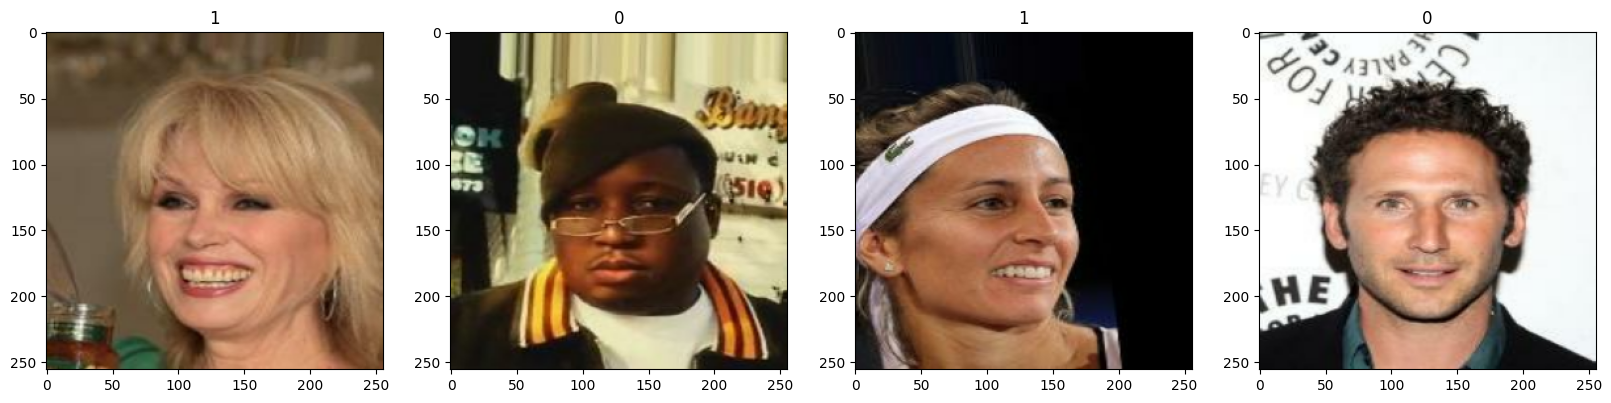

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [78]:
data = unscaled_data.map(lambda x,y: (x/255, y))

In [79]:
data.as_numpy_iterator().next()

(array([[[[0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          ...,
          [0.0089614 , 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ]],
 
         [[0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          ...,
          [0.0089614 , 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ]],
 
         [[0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          [0.08627451, 0.10196079, 0.09803922],
          ...,
          [0.0089614 , 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ],
          [0.01176471, 0.01568628, 0.        ]],
 
         ...,
 
         [[0.6804534 , 0.61378676, 0.55104166],
          [0.67619

In [80]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [83]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [84]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [86]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:
hist = model.fit(train, epochs = 5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
44/44 [==============================] - 74s 2s/step - loss: 0.7077 - accuracy: 0.5895 - val_loss: 0.6191 - val_accuracy: 0.6562
Epoch 2/5
44/44 [==============================] - 75s 2s/step - loss: 0.5651 - accuracy: 0.7244 - val_loss: 0.5300 - val_accuracy: 0.7422
Epoch 3/5
44/44 [==============================] - 76s 2s/step - loss: 0.3959 - accuracy: 0.8168 - val_loss: 0.3697 - val_accuracy: 0.7995
Epoch 4/5
44/44 [==============================] - 98s 2s/step - loss: 0.2565 - accuracy: 0.9006 - val_loss: 0.3319 - val_accuracy: 0.8542
Epoch 5/5
44/44 [==============================] - 69s 2s/step - loss: 0.1958 - accuracy: 0.9212 - val_loss: 0.3697 - val_accuracy: 0.8594


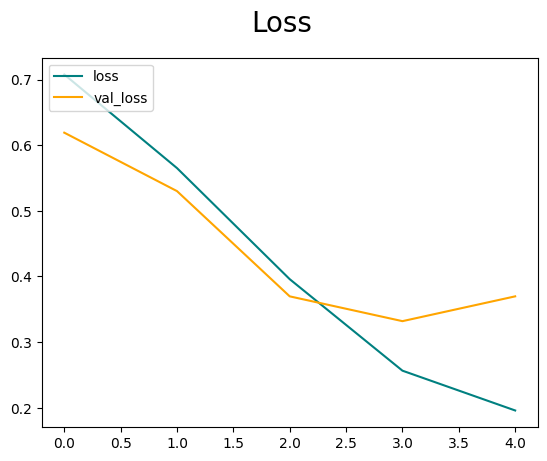

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

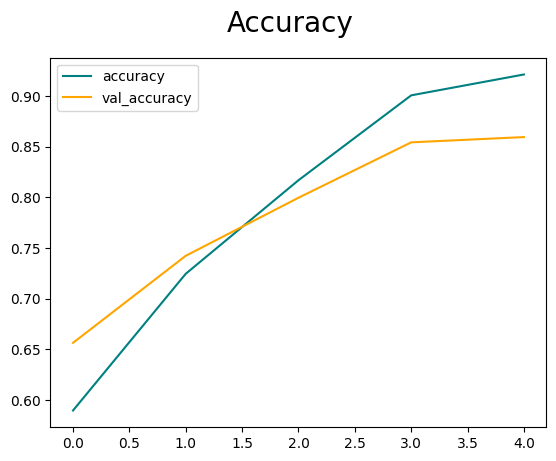

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [90]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [91]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [92]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 327ms/step
tf.Tensor(0.8210526, shape=(), dtype=float32) tf.Tensor(0.8965517, shape=(), dtype=float32) tf.Tensor(0.8645833, shape=(), dtype=float32)


In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()